# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   schaetzwert_bp_sys   14831 non-null  float64
 8   schaetzwert_by_dia   14831 non-null  float64
 9   messwert_bp_sys      14831 non-null  float64
 10  messwert_bp_dia      14831 non-null  float64
 11  age                  14831 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.3+ MB


In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['bundesland', 'befinden', 'geschlecht', 'raucher', 'blutzucker_bekannt',
       'cholesterin_bekannt', 'in_behandlung', 'schaetzwert_bp_sys',
       'schaetzwert_by_dia', 'messwert_bp_sys', 'messwert_bp_dia', 'age'],
      dtype='object')


### Models for Diastolic as target

In [8]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

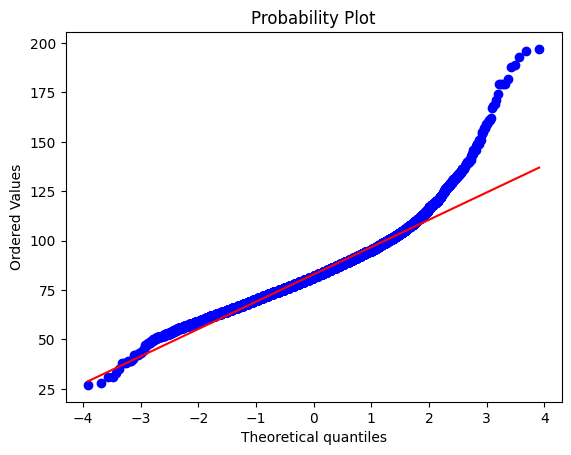

In [9]:
generate_qq_plot(data_df[target_dia])

Base Model

In [10]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     390.5
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        03:15:26   Log-Likelihood:                -39151.
No. Observations:               10381   AIC:                         7.835e+04
Df Residuals:                   10358   BIC:                         7.852e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      16.2929      1.591     10.241      0.000      13.174      19.411
bundesland_Kärnten             -2.2566      1.461     -1.545      0.122      -5.120       0.606
bundesland_Niederösterreich    -1.4556      1.289     -1.130      0.259      -3.982       1.070
bundesland_Oberösterreich      -1.9201      1.421     -1.351      0.177      -4.706       0.866
bundesland_Salzburg            -1.0767      1.712     -0.629      0.529      -4.432       2.278
bundesland_Steiermark          -1.4330      1.134     -1.264      0.206      -3.656       0.790
bundesland_Tirol               -2.1471      1.906     -1.127      0.260      -5.883       1.589
bundesland_Vorarlberg           1.2893      2.670      0.483      0.629      -3.944       6.522
bundesland_Wien                 0.0799      1.270      0.063      0.950      -2.409       2.569
bundesland_not_applicable      -0.9350      1.369     -0.683      0.495      -3.618       1.749
befinden_2                     -0.8614      0.233     -3.702      0.000      -1.318      -0.405
befinden_3                     -0.8755      0.333     -2.630      0.009      -1.528      -0.223
befinden_4                     -0.9268      0.961     -0.964      0.335      -2.810       0.957
befinden_5                      4.0912      1.658      2.468      0.014       0.842       7.341
geschlecht_m                    0.8256      0.214      3.863      0.000       0.407       1.245
raucher_True                    0.3330      0.286      1.165      0.244      -0.227       0.893
blutzucker_bekannt_True        -0.0942      0.293     -0.321      0.748      -0.669       0.481
cholesterin_bekannt_True       -0.0191      0.273     -0.070      0.944      -0.554       0.516
in_behandlung_True             -1.9615      0.338     -5.796      0.000      -2.625      -1.298
schaetzwert_bp_sys             -0.0261      0.008     -3.260      0.001      -0.042      -0.010
schaetzwert_by_dia              0.1421      0.013     11.036      0.000       0.117       0.167
messwert_bp_sys                 0.5060      0.006     84.549      0.000       0.494       0.518
age                            -0.0740      0.007    -10.027      0.000      -0.088      -0.060
==============================================================================
Omnibus:                     1386.617   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4433.195
Skew:                           0.688   Prob(JB):                         0.00
Kurtosis:                       5.891   Cond. No.                     7.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

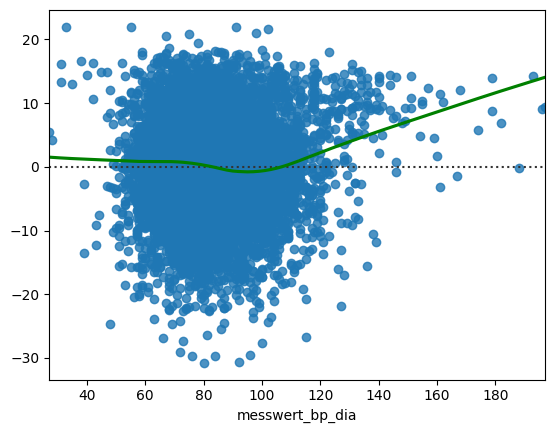

In [11]:
generate_residual_plot(Y_train_dia, model_base_dia)

Best Subset

In [12]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys', 'age']
Train Results:  {'r_2': 0.4527934634492604, 'adjusted_r_2': 0.45210727795922867, 'mse': 110.61639921845199}
Test Results:  {'r_2': 0.46280837604541714, 'adjusted_r_2': 0.46123409941976123, 'mse': 106.57196365188229}


In [13]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     659.9
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        03:15:33   Log-Likelihood:                -39157.
No. Observations:               10381   AIC:                         7.834e+04
Df Residuals:                   10367   BIC:                         7.844e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.8918      1.119     13.314      0.000      12.699      17.084
befinden_2                  -0.8678      0.233     -3.731      0.000      -1.324      -0.412
befinden_3                  -0.8717      0.333     -2.619      0.009      -1.524      -0.219
befinden_4                  -0.8354      0.959     -0.871      0.384      -2.716       1.045
befinden_5                   4.2872      1.656      2.590      0.010       1.042       7.532
geschlecht_m                 0.8301      0.214      3.886      0.000       0.411       1.249
raucher_True                 0.3356      0.285      1.175      0.240      -0.224       0.895
blutzucker_bekannt_True     -0.0654      0.293     -0.223      0.823      -0.639       0.509
cholesterin_bekannt_True    -0.0130      0.273     -0.048      0.962      -0.547       0.521
in_behandlung_True          -1.9415      0.338     -5.739      0.000      -2.605      -1.278
schaetzwert_bp_sys          -0.0260      0.008     -3.247      0.001      -0.042      -0.010
schaetzwert_by_dia           0.1422      0.013     11.043      0.000       0.117       0.167
messwert_bp_sys              0.5058      0.006     84.568      0.000       0.494       0.517
age                         -0.0735      0.007     -9.966      0.000      -0.088      -0.059
==============================================================================
Omnibus:                     1383.174   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4437.045
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                       5.895   Cond. No.                     3.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, train_results_base_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),110.497,106.802,0.453,0.462,0.452,0.459
1,LM (Best Subset),106.572,110.497,0.463,0.453,0.461,0.452


### Models for Systolic as target

In [15]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

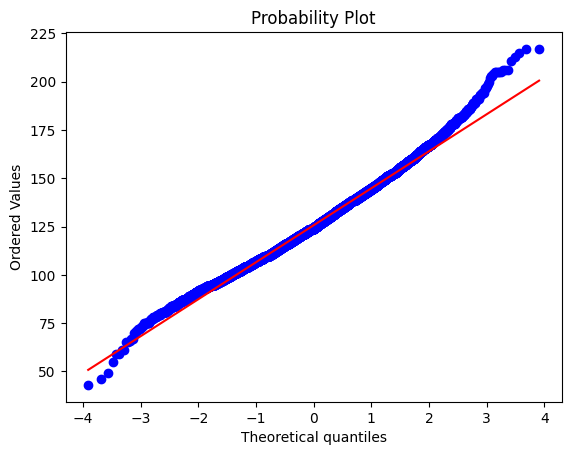

In [16]:
generate_qq_plot(data_df[target_sys])

Base Model

In [17]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     515.5
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        03:15:34   Log-Likelihood:                -41573.
No. Observations:               10381   AIC:                         8.319e+04
Df Residuals:                   10358   BIC:                         8.336e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      28.6723      1.999     14.340      0.000      24.753      32.592
bundesland_Kärnten              2.9023      1.844      1.574      0.116      -0.713       6.518
bundesland_Niederösterreich     0.3252      1.627      0.200      0.842      -2.865       3.515
bundesland_Oberösterreich       0.4810      1.795      0.268      0.789      -3.037       3.999
bundesland_Salzburg            -2.2255      2.161     -1.030      0.303      -6.462       2.011
bundesland_Steiermark           0.9189      1.432      0.642      0.521      -1.889       3.726
bundesland_Tirol               -1.2445      2.407     -0.517      0.605      -5.962       3.473
bundesland_Vorarlberg          -5.5243      3.371     -1.639      0.101     -12.132       1.083
bundesland_Wien                -0.7024      1.603     -0.438      0.661      -3.845       2.441
bundesland_not_applicable      -0.4261      1.729     -0.246      0.805      -3.815       2.963
befinden_2                      0.7017      0.294      2.387      0.017       0.126       1.278
befinden_3                      0.2069      0.421      0.492      0.623      -0.617       1.031
befinden_4                      0.8113      1.213      0.669      0.504      -1.567       3.190
befinden_5                     -1.7023      2.094     -0.813      0.416      -5.807       2.402
geschlecht_m                    1.2836      0.270      4.758      0.000       0.755       1.813
raucher_True                   -0.5506      0.361     -1.526      0.127      -1.258       0.157
blutzucker_bekannt_True         0.7593      0.370      2.051      0.040       0.034       1.485
cholesterin_bekannt_True       -0.2692      0.344     -0.782      0.435      -0.944       0.406
in_behandlung_True              4.7355      0.425     11.130      0.000       3.901       5.570
schaetzwert_bp_sys              0.1720      0.010     17.260      0.000       0.152       0.192
schaetzwert_by_dia             -0.0354      0.016     -2.162      0.031      -0.067      -0.003
messwert_bp_dia                 0.8069      0.010     84.549      0.000       0.788       0.826
age                             0.2053      0.009     22.445      0.000       0.187       0.223
==============================================================================
Omnibus:                       75.437   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.613
Skew:                           0.160   Prob(JB):                     2.57e-19
Kurtosis:                       3.310   Cond. No.                     6.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

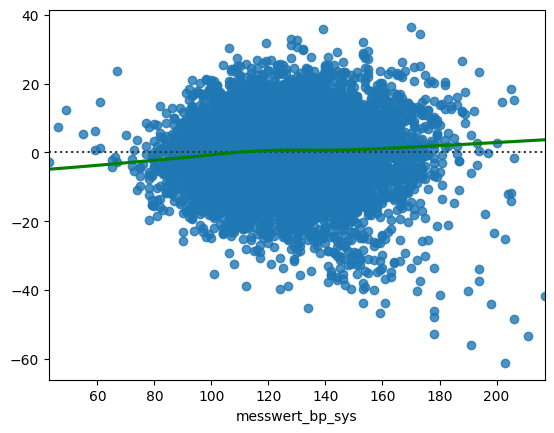

In [18]:
generate_residual_plot(Y_train_sys, model_base_sys)

Best Subset

In [19]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_dia', 'age']
Train Results:  {'r_2': 0.5218570051653761, 'adjusted_r_2': 0.5212112399784492, 'mse': 176.5011987232859}
Test Results:  {'r_2': 0.526053604732847, 'adjusted_r_2': 0.5245574943531988, 'mse': 176.4473942535199}


In [20]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     808.1
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        03:15:41   Log-Likelihood:                -41582.
No. Observations:               10381   AIC:                         8.319e+04
Df Residuals:                   10366   BIC:                         8.330e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    29.4417      1.395     21.100      0.000      26.706      32.177
bundesland_not_applicable    -1.2430      0.988     -1.258      0.208      -3.180       0.694
befinden_2                    0.7131      0.294      2.425      0.015       0.137       1.289
befinden_3                    0.2172      0.421      0.516      0.606      -0.607       1.042
befinden_4                    0.6939      1.212      0.573      0.567      -1.681       3.069
befinden_5                   -1.8635      2.093     -0.890      0.373      -5.966       2.239
geschlecht_m                  1.2785      0.270      4.739      0.000       0.750       1.807
raucher_True                 -0.5443      0.361     -1.509      0.131      -1.251       0.163
blutzucker_bekannt_True       0.7293      0.370      1.972      0.049       0.004       1.454
cholesterin_bekannt_True     -0.2855      0.344     -0.829      0.407      -0.961       0.390
in_behandlung_True            4.7228      0.426     11.099      0.000       3.889       5.557
schaetzwert_bp_sys            0.1718      0.010     17.242      0.000       0.152       0.191
schaetzwert_by_dia           -0.0342      0.016     -2.091      0.037      -0.066      -0.002
messwert_bp_dia               0.8071      0.010     84.567      0.000       0.788       0.826
age                           0.2047      0.009     22.395      0.000       0.187       0.223
==============================================================================
Omnibus:                       75.202   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.018
Skew:                           0.161   Prob(JB):                     3.46e-19
Kurtosis:                       3.305   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

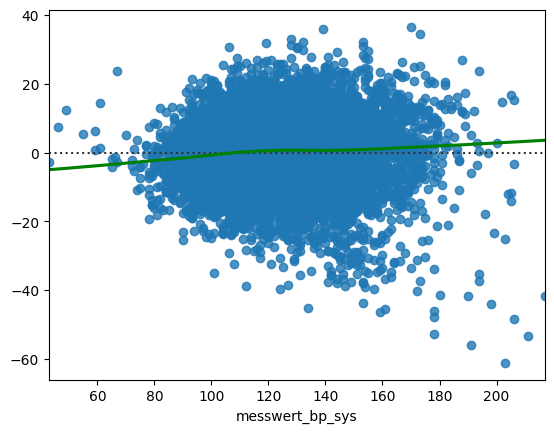

In [21]:
generate_residual_plot(Y_train_sys, model_best_sys)

In [22]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, train_results_base_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),176.199,176.666,0.523,0.525,0.522,0.523
1,LM (Best Subset),176.447,176.199,0.526,0.523,0.525,0.522
